In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.image as mpimg
import cv2
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
from PIL import Image
from sklearn.preprocessing import StandardScaler

In [4]:
images_with_mask_dir = "D:\A_STUDY_SPECIAL\computer_vision\important\data\with_mask"
images_without_mask_dir = "D:\A_STUDY_SPECIAL\computer_vision\important\data\without_mask"

In [5]:
images_with_mask = os.listdir(images_with_mask_dir)
images_without_mask = os.listdir(images_without_mask_dir)

In [6]:
print(images_with_mask[:5])
print(len(images_with_mask))
print(images_without_mask[:5])
print(len(images_without_mask))

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
3725
['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
3828


# #Display few images with mask and without mask

In [7]:
def show_images(image_dir, image_files, num_images=6):
    plt.figure(figsize=(15, 7))       #size of the image we are viewing
    for i in range(num_images):   
        plt.subplot(1, num_images, i+1)       # 1 is row and num_images is cols and i+1 is index
        img_path = os.path.join(image_dir, image_files[i])
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(image_files[i])
        plt.axis('off')
    plt.show()


Images with masks:


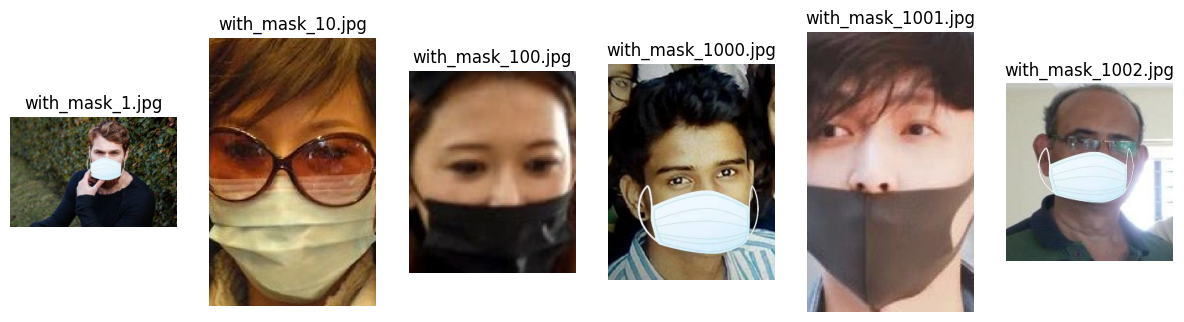

In [8]:
# Display some images with masks
print("Images with masks:")
show_images(images_with_mask_dir, images_with_mask)

Images without masks:


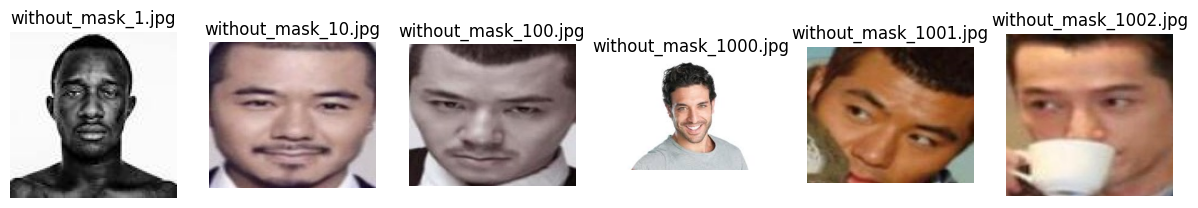

In [9]:
print("Images without masks:")
show_images(images_without_mask_dir, images_without_mask)

# Preprocessing 

In [10]:
data_path = "D:\A_STUDY_SPECIAL\computer_vision\important\data"
categories = ["with_mask","without_mask"]
data=[]
labels=[]
for category in categories:
  file_path = os.path.join(data_path,category) #with_mask and without_mask folders path
  for img in os.listdir(file_path):
    image_path = os.path.join(file_path,img)# these are images path which is present inside with_mask and without_mask folders
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  #convert colour image to grey to reduce compputation
    resize_image = cv2.resize(gray_image,(50,50))  #resize to bring all the images to similar size
    image_array = np.array(resize_image)
    # print(image_array)
    data.append(image_array)
    if category=="with_mask":
      labels.append(1)
    elif category =="without_mask":
      labels.append(0)

In [11]:
print(data[0].shape)
print(len(data))
print(len(labels))

(50, 50)
7553
7553


In [12]:
# Check if the variable is a NumPy array
if isinstance(data[0], np.ndarray):
    print("Variable is a NumPy array")
else:
    print("Variable is not a NumPy array")

Variable is a NumPy array


In [13]:
data=np.array(data)  #shape is (7553,50,50) we have 7553 images each of size (50,50)
num_columns = data.shape[1] * data.shape[2] 
reshaped_data = data.reshape(data.shape[0], num_columns)  #(7553,2500)
df = pd.DataFrame(reshaped_data)
df['Labels'] = labels

In [14]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,Labels
0,52,65,49,60,68,74,104,85,79,42,...,5,12,70,24,22,65,9,12,11,1
1,94,82,64,71,64,41,40,43,43,56,...,78,88,154,180,183,189,192,183,168,1
2,24,28,15,10,7,6,8,10,13,18,...,26,16,8,16,14,12,17,25,39,1
3,135,135,136,131,124,113,87,30,2,152,...,142,213,200,169,193,219,214,163,157,1
4,76,76,75,73,73,78,75,75,74,69,...,215,215,215,213,206,196,81,98,123,1


# Training using KNN

In [16]:
def sample_train_test_accuracy(X_train, y_train, X_test, y_test):
    subset_sizes = np.linspace(0.001, 0.3, num=10)  # 0.1% to 10%  i.e.,
# ex: - [0.001, 0.01211111,0.02322222,0.03433333,0.04544444,0.05655556,0.06766667,0.07877778,0.08988889,0.1] 
    accuracies = []
    f1_scores=[]
    for size_percentage in subset_sizes:
        # Sample subset of training data
        X_subset,_ , y_subset, _ = train_test_split(X_train, y_train, train_size=size_percentage, random_state=42)
        #I did not take test from here becuase when train is 0.1% test will be remianing 99.9% which is very high
        #To reduce the dimensionality we are using PCA
        desired_variance = 0.95
        pca = PCA(n_components=desired_variance)
        X_train_pca = pca.fit_transform(X_subset)
        X_test_pca = pca.transform(X_test)
        # kNN classifier
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train_pca, y_subset)
        y_pred = knn.predict(X_test_pca)
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        f1 = f1_score(y_test, y_pred)
        f1_scores.append(f1)

    plt.plot(subset_sizes * 100, accuracies, marker='o', label='Accuracy')
    plt.plot(subset_sizes * 100, f1_scores, marker='o', label='F1 Score')
    plt.xlabel("Training Set Size (%)")
    plt.ylabel("Metric Score")
    plt.title("Test Metric Score vs. Training Set Size")
    plt.legend()
    plt.grid(True)
    plt.show()


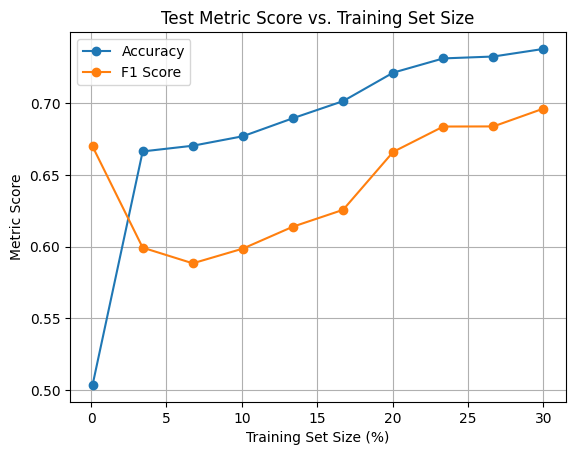

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Labels', axis=1), df['Labels'], test_size=0.2, random_state=42)
sample_train_test_accuracy(X_train, y_train, X_test, y_test)

In [24]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import cv2
# code tự thêm 

def predict_image_label(image_path, pca_model, knn_model):
    # Đọc bức ảnh mới
    new_image = cv2.imread(image_path)
    # Tiền xử lý ảnh mới (chuyển đổi sang ảnh xám, thay đổi kích thước, chuyển đổi thành một mảng)
    gray_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
    resize_image = cv2.resize(gray_image, (50, 50))
    image_array = np.array(resize_image)
    reshaped_image = image_array.reshape(1, -1)
    # Áp dụng PCA để giảm chiều dữ liệu
    new_image_pca = pca_model.transform(reshaped_image)
    # Dự đoán nhãn của bức ảnh mới
    predicted_label = knn_model.predict(new_image_pca)
    return predicted_label

# Your existing code to load and preprocess the data here

# Initialize and fit PCA
desired_variance = 0.95
pca = PCA(n_components=desired_variance)
X_train_pca = pca.fit_transform(X_train)

# Initialize and fit kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)

# Sử dụng hàm để dự đoán nhãn của bức ảnh mới
predicted_label = predict_image_label("D:\A_STUDY_SPECIAL\computer_vision\important\Screenshot.png", pca, knn)
print("Predicted label:", predicted_label)


Predicted label: [0]


# Training using SVM

In [ ]:
def sample_train_test_accuracy_svm(X_train, y_train, X_test, y_test):
    subset_sizes = np.linspace(0.001, 0.1, num=10)  # 0.1% to 10%
    accuracies = []
    f1_scores=[]

    for size_percentage in subset_sizes:
        # Sample subset of training data
        X_subset, _, y_subset, _ = train_test_split(X_train, y_train, train_size=size_percentage, random_state=42)
        #To reduce the dimensionality we are using PCA
        desired_variance = 0.95
        pca = PCA(n_components=desired_variance)
        X_train_pca = pca.fit_transform(X_subset)
        X_test_pca = pca.transform(X_test)
        classifier_model = SVC(kernel='rbf')

        classifier_model.fit(X_train_pca, y_subset)
        y_pred = classifier_model.predict(X_test_pca)
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        f1 = f1_score(y_test, y_pred)
        f1_scores.append(f1)

    plt.plot(subset_sizes * 100, accuracies, marker='o', label='Accuracy')
    plt.plot(subset_sizes * 100, f1_scores, marker='o', label='F1 Score')
    plt.xlabel("Training Set Size (%)")
    plt.ylabel("Metric Score")
    plt.title("Test Metric Score vs. Training Set Size")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df.drop('Labels', axis=1), df['Labels'], test_size=0.2, random_state=42)
sample_train_test_accuracy_svm(X_train1, y_train1, X_test1, y_test1)

# Training using CNN

In [ ]:
categories = ["with_mask","without_mask"]
data_cnn=[]
labels_cnn=[]

path_of_data = "/kaggle/input/face-mask-dataset/data"
for category in categories:
  file_path1 = os.path.join(path_of_data,category) #with_mask and without_mask folders path
  for img in os.listdir(file_path1):
    image_path = os.path.join(file_path1,img)# these are images path which is present inside with_mask and without_mask folders
    image = cv2.imread(image_path)
    #here i am not converting the image into Grey
    resize_image = cv2.resize(image,(128,128))  #resize to bring all the images to similar size
    image_array = np.array(resize_image)
    # print(image_array)
    data_cnn.append(image_array)
    if category=="with_mask":
      labels_cnn.append(1)
    elif category =="without_mask":
      labels_cnn.append(0)

In [ ]:
data_cnn[0].shape

In [ ]:
X=np.array(data_cnn)
Y=np.array(labels_cnn)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

In [ ]:
model.summary()

In [ ]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)

In [ ]:
plt.plot(history.history['acc'], label='train accuracy')
plt.plot(history.history['val_acc'], label='validation accuracy')

plt.legend()
plt.show()